In [103]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
DATASET = "/home/exterior/Documents/IML/_data/Dataset/Dataset Visti a Lezione/"

/tmp/ipykernel_29337/3998199029.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
titanic = pd.read_csv(DATASET + 'titanic.csv')

In [5]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [69]:
titanic[titanic['Age'].isnull()==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/tmp/ipykernel_29337/4099501815.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar([0,1],[titanic[titanic['Survived']==sur][titanic['Cabin'].isnull()==0]['Survived'].size for sur in [0,1]])
/tmp/ipykernel_29337/4099501815.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar([0,1],[titanic[titanic['Survived']==sur][titanic['Cabin'].isnull()==0]['Survived'].size for sur in [0,1]])


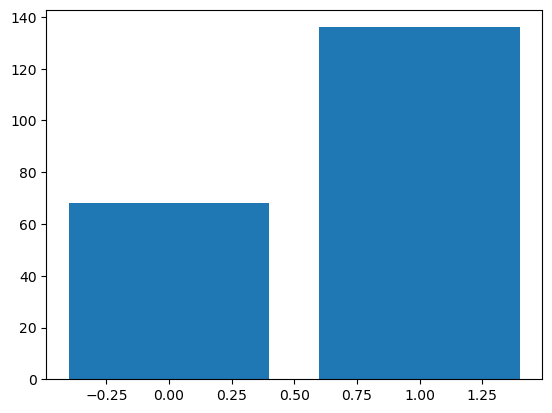

In [71]:
classes = list(titanic['Pclass'].unique())
plt.bar([0,1],[titanic[titanic['Survived']==sur][titanic['Cabin'].isnull()==0]['Survived'].size for sur in [0,1]])
plt.show()

In [ ]:
df2 = pd.DataFrame({
    "apples": titanic["apples"].value_counts(),
    "count": titanic[titanic['Cabin'].isnull()==0][]
})

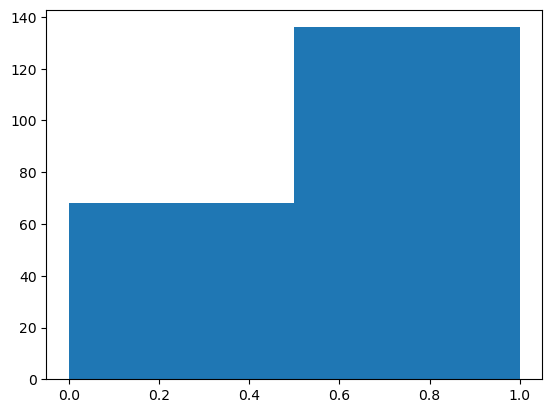

In [39]:
plt.hist(titanic[titanic['Cabin'].isnull()==0]['Survived'],2)
plt.show()

In [194]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,0,2


/home/exterior/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exterior/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exterior/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exterior/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

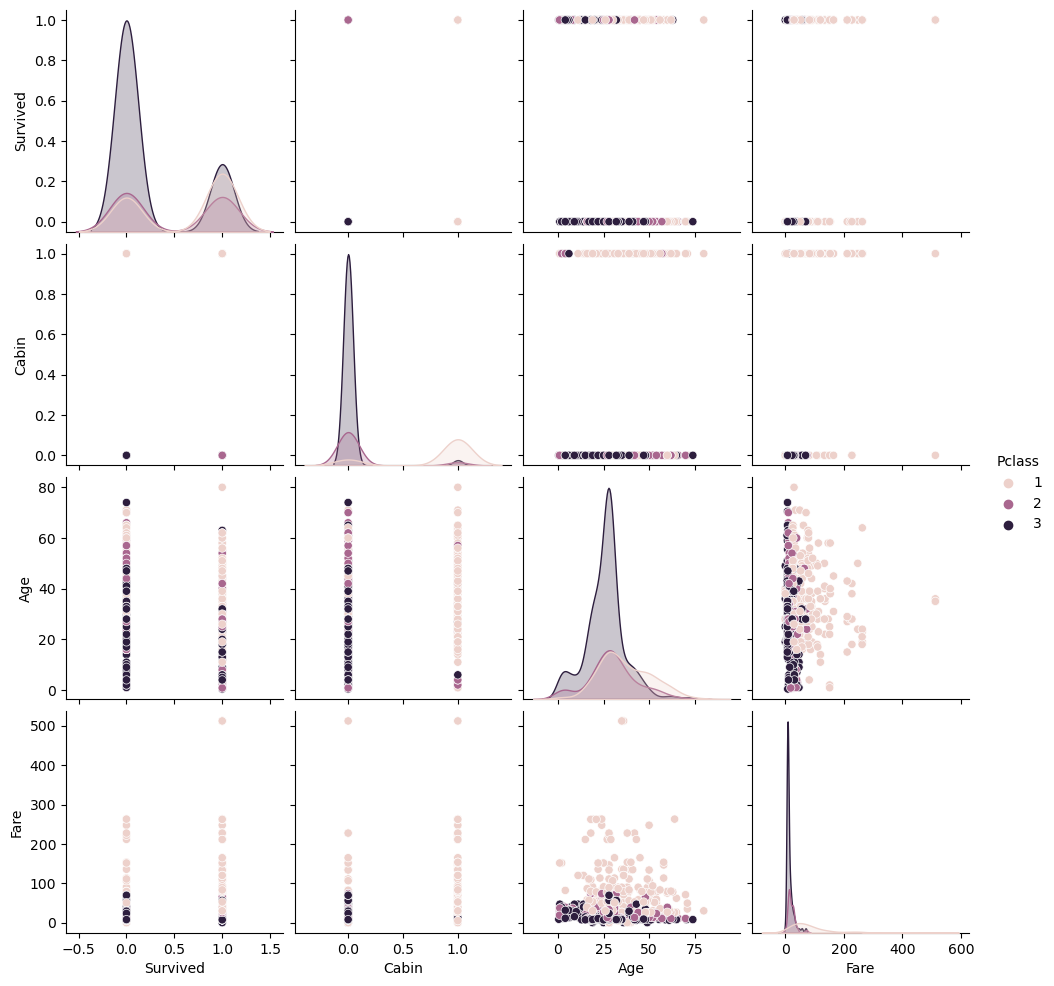

In [195]:
sns.pairplot(df[["Survived","Cabin","Age","Fare","Pclass"]],hue='Pclass')

In [64]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [159]:
df = titanic.drop(['Name','Ticket','PassengerId'],axis=1) # Also cabin and embarked

In [136]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,2
1,1,1,0,38.0,1,0,71.2833,C85,0
2,1,3,0,26.0,0,0,7.9250,NaN,2
3,1,1,0,35.0,1,0,53.1000,C123,2
4,0,3,1,35.0,0,0,8.0500,NaN,2
5,0,3,1,NaN,0,0,8.4583,NaN,1
6,0,1,1,54.0,0,0,51.8625,E46,2
7,0,3,1,2.0,3,1,21.0750,NaN,2
8,1,3,0,27.0,0,2,11.1333,NaN,2
9,1,2,0,14.0,1,0,30.0708,NaN,0


In [182]:
scaler = StandardScaler()
scaler.fit(df.values)

StandardScaler()

In [161]:
genderEncoder = LabelEncoder()
embarkedEncoder = LabelEncoder()
#cabinEncoder = LabelEncoder()

genderEncoder.fit(df['Sex'])
embarkedEncoder.fit(df['Embarked'])
#cabinEncoder.fit(df['Cabin'])

LabelEncoder()

In [162]:
df['Sex'] = genderEncoder.transform(df['Sex'])
df['Embarked'] = embarkedEncoder.transform(df['Embarked']),dtype={'birth':int}
# df['Cabin'] = cabinEncoder.transform(df['Cabin'])

In [120]:
embarkedEncoder.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [197]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,2
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,0,2
5,0,3,1,28.0,0,0,8.4583,0,1
6,0,1,1,54.0,0,0,51.8625,1,2
7,0,3,1,2.0,3,1,21.0750,0,2
8,1,3,0,27.0,0,2,11.1333,0,2
9,1,2,0,14.0,1,0,30.0708,0,0


In [186]:
if df[df['Cabin'].isnull()]['Cabin'].any():
    df.loc[df['Cabin'].isnull()==0,'Cabin'] = 1
    df.loc[df['Cabin'].isnull()==1,'Cabin'] = 0

In [180]:
df.info()
titanic['Parch'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Parch
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [190]:
if df[df['Age'].isnull()]['Age'].any():    
    df.loc[df['Age'].isnull(),'Age'] = df['Age'].median()